<a href="https://colab.research.google.com/github/JarvisSan22/JC_learn_python_Notebooks/blob/main/TJC_Shapely_Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install shapely

In [9]:
import shapely 
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [139]:
points

array([[[  0, 200],
        [200,   0],
        [200, 100],
        [100, 100],
        [100, 200]]])

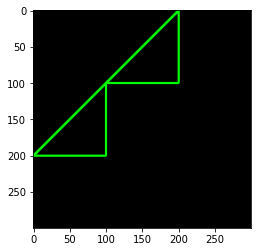

In [136]:
Random_polygon=np.random.randint(3, size =(2,5))
points=Random_polygon.reshape( 1, -1, 2)*100

img = np.zeros((300, 300, 3), dtype=np.uint8)

cv2.polylines(img, points, isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(img)

# Polygone Area : [Shoelace Formula ](https://en.wikipedia.org/wiki/Shoelace_formula)
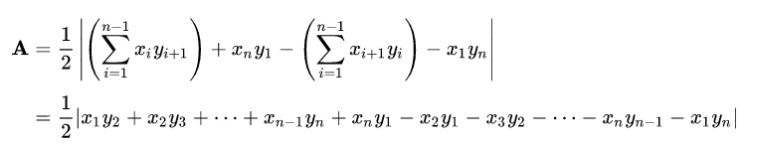

In [137]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [138]:
x,y=points[0][:,0],points[0][:,1]
PolyArea(x,y)

10000.0

In [35]:
from shapely.geometry import Polygon
randomPoly = Polygon(zip(x, y)) 
print(randomPoly.area) 

10000.0


# Upload image - Contor area 

In [86]:
def upload_file(): 
  from google.colab import files 
  uploaded = files.upload() 
  for k, v in uploaded.items(): 
    open(k, 'wb').write(v) 
  return list(uploaded.keys())[0] 
file=upload_file()

Saving images.jpg to images.jpg


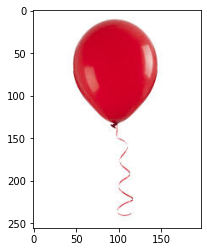

In [141]:
img=cv2.imread(file)[:,:,::-1] #RGB -> BGR  
plt.imshow(img)

[0, 1, 2]
band-0
band-1
band-2


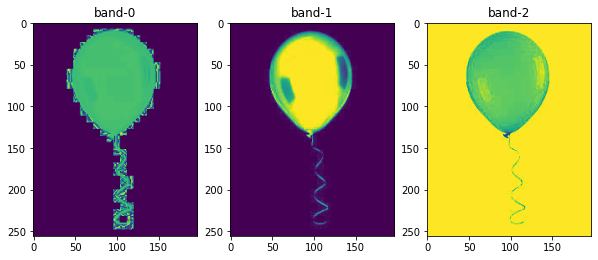

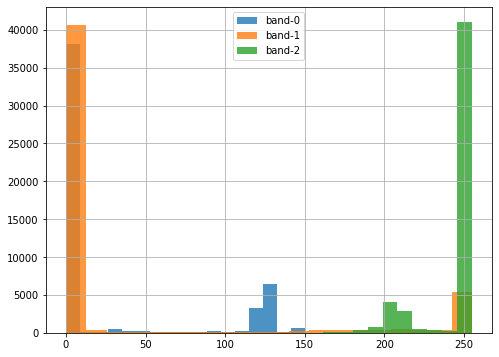

In [88]:
hsvim = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
fig,axs=plt.subplots(1,3,figsize=(10,10))

for b in range(3):
  axs[b].imshow(hsvim[:,:,b])
  axs[b].set_title(f"band-{b}")

def hist_color_img(img,bands,ax=None,range=None): 
  if not ax: 
    fig,ax=plt.subplots(1,1,figsize=(8,6)) 
  print(bands) 
  for band in bands: 
     print(f"band-{band}") 
     _= ax.hist(img[:,:,band].reshape(-1),bins=20,label=f"band-{band}",alpha=0.8,range=range) 
  ax.legend() 
  ax.grid() 
  #plt.show() 
hist_color_img(hsvim,[0,1,2])

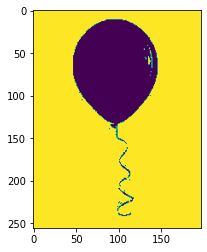

In [146]:
lower = np.array([0, 0, 0], dtype = "uint8")
upper = np.array([255, 255, 240], dtype = "uint8")
RegionHSV = cv2.inRange(hsvim, lower, upper)

ret,thresh = cv2.threshold(~RegionHSV,0,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

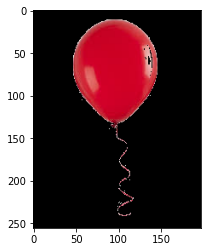

In [153]:
out_img=cv2.bitwise_or(img, img,mask=~thresh)
plt.imshow(out_img)

In [154]:
contours, hierarchy = cv2.findContours(thresh, 1, 3)
contours=list([c for c in contours if len(c)>2])
len(contours)

13

11 74 46 10 101 130


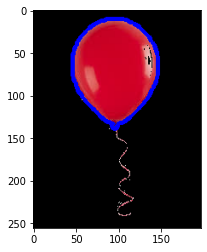

In [155]:
i=0
for c in contours:
  x, y, w, h = cv2.boundingRect(c)
  
  if len(c)>20:
    print(i,len(c),x,y,w,h)
    c=c.reshape(1,-1,2)
    
    #cv2.rectangle(out_img, (x, y), (x + w, y + h), (200, 0, 0), 2)
    cv2.polylines(out_img, c, isClosed=True, color=(0, 0, 255), thickness=4)
  i+=1
plt.imshow(out_img)

In [120]:
balloon_poly=contours[11].reshape( 1, -1, 2)
x,y=balloon_poly[0][:,0],balloon_poly[0][:,1]
balloon_poly= Polygon(zip(x, y)) 
print("ballon pixel area",balloon_poly.area) 

ballon pixel area 9360.5


Text(0.5, 1.0, 'ballon pixel area 9360.5')

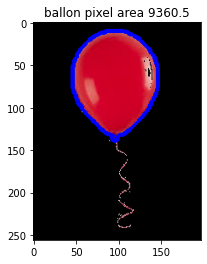